In [75]:
#!pip install --upgrade scikit-learn
import sklearn
import sklearn.tree
#import sklearn.linear_model.LogisticRegression
from sklearn import svm
import sklearn.datasets
import sklearn.preprocessing
import sklearn.decomposition
#import sklearn.ensemble

import urllib
import bs4
import itertools

import pandas as pd
import pandas.plotting 

import numpy as np

from os import system

import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("white")

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#000000'])

In [76]:
# Importing the News Popularity Dataset
data=pd.read_csv("/Users/parsat8/Desktop/Fall quarter/Machine Learning for analytics/Final Project/OnlineNewsPopularity/OnlineNewsPopularity.csv")

In [77]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [78]:
# check for the number of rows and columns
data.shape

(39644, 61)

In [79]:
# Check each column values data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [80]:
# Name of the columns
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

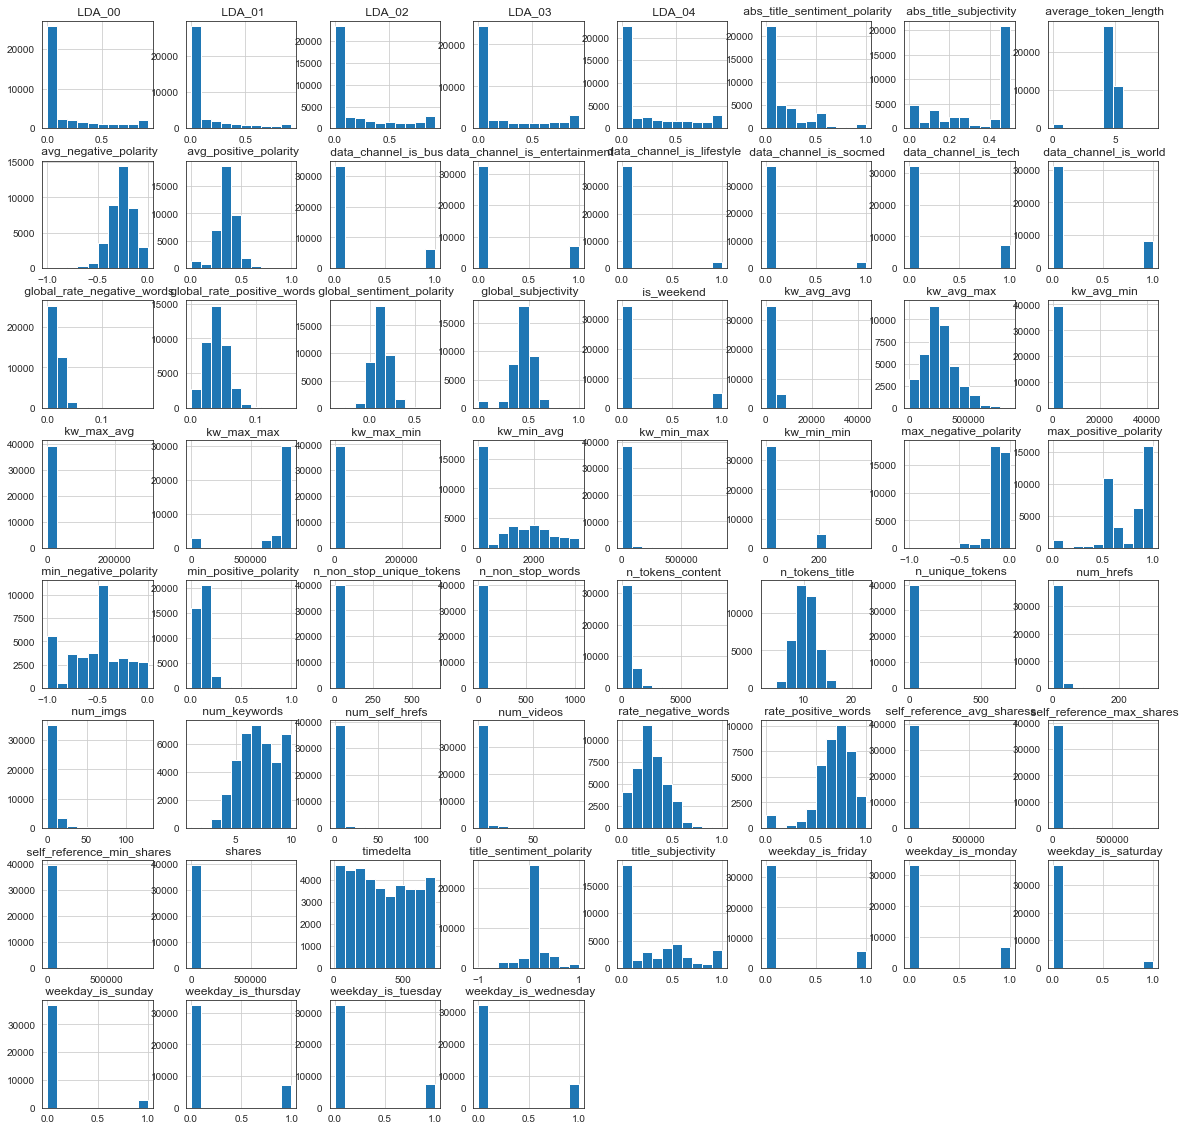

In [81]:
# Plotting the distribution of the data
data.hist(figsize=(20,20))
plt.show()

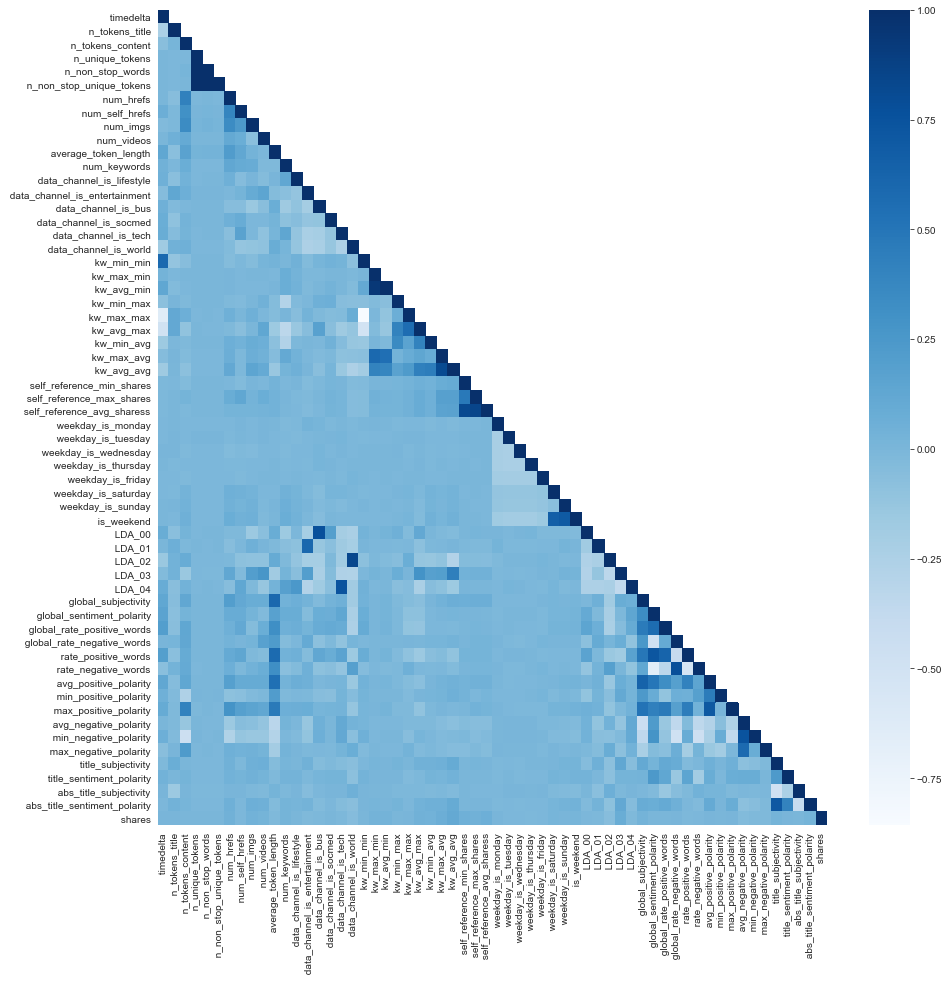

In [82]:
# Creating a correlation heatmap in order to detect Multicollinearity

cor=data.corr()
#ns.heatmap(cor)
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

In [83]:
#Removing Space Character from Feature names
data.columns=data.columns.str.replace(" ","")

In [84]:
# n_tokens_content represents Number of words in the content
# However its minimum value to be 0. Means that there are articles that do not have any content.
# Such records should be dropped as their related attributes add no meaning to our analysis

# find number of rows that contain 0 for n_tokens_content
num_of_nowords=data[data['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 1181


In [85]:
# Let's exclude the URL column
del data["url"]

In [86]:
# Also timedelta is a non-predictive attribute and not a feature of the data set so we can drop it from the dataset
# Drop highly correlated attributes "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"
data = data.drop('timedelta',axis=1)
data = data.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [87]:
# Create a new target variable
data['popularity'] = data['shares'].apply(lambda x: 0 if x <1400 else 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe866acab20>]],
      dtype=object)

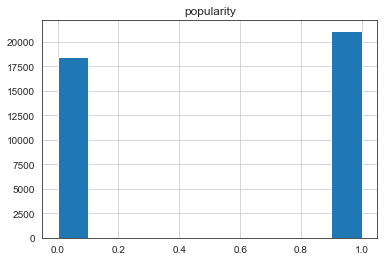

In [88]:
data.hist(column='popularity')

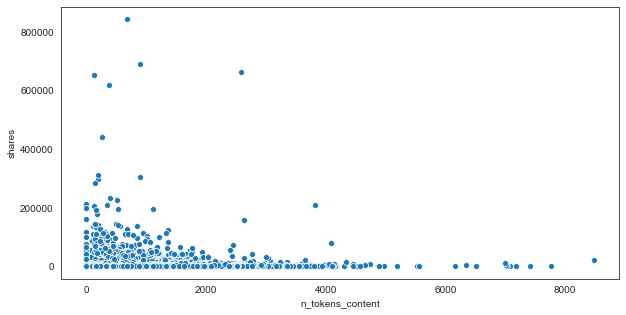

In [89]:
# Number of words in content vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=data)

In [90]:
# Getting the mean and median of the shares column
a,b = data['shares'].mean(),data['shares'].median()

In [91]:
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 3395.3801836343455
Median article share = 1400.0


In [92]:
# subseting columns related to the days of a week

Wday = data.columns.values[27:33]
Wday

array(['weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

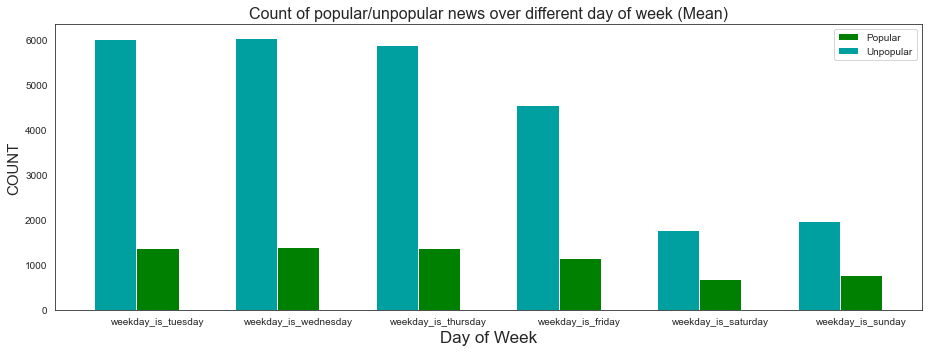

In [93]:
Unpop=data[data['shares']<a]
Pop=data[data['shares']>=a]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)
plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')
plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

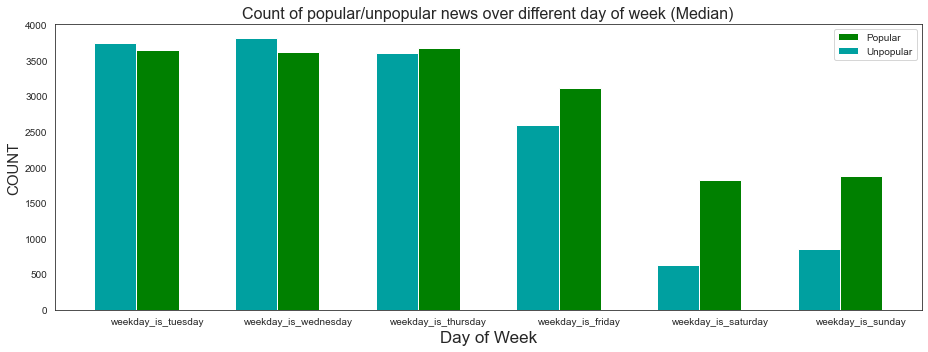

In [94]:
Unpop=data[data['shares']<b]
Pop=data[data['shares']>=b]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)
#for i, v in enumerate(Pop_day):
#    fig.text(i+25, 
#              v/Pop_day[i]+50, 
#              Pop_day[i], 
#              fontsize=5)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [95]:
Dc=data.columns[10:15]
Dc

Index(['data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

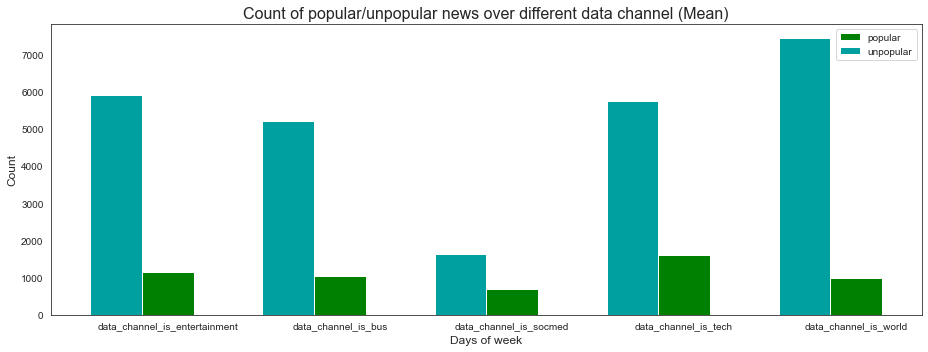

In [96]:
Unpop3=data[data['shares']<a]
Pop3=data[data['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

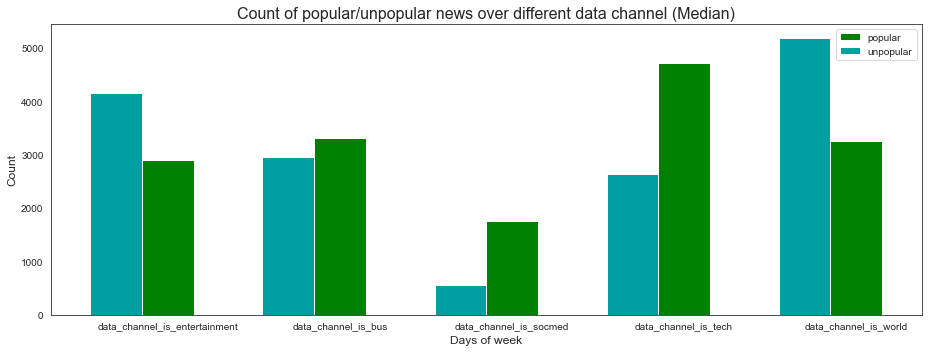

In [97]:
Unpop4=data[data['shares']<b]
Pop4=data[data['shares']>=b]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day4, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

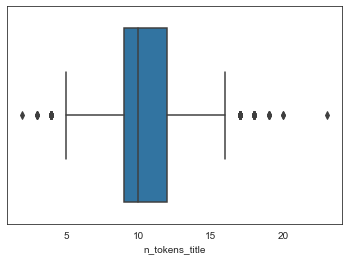

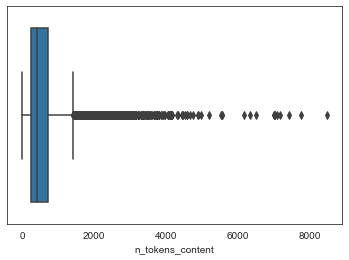

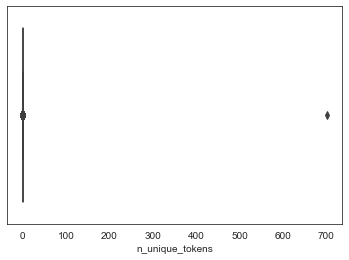

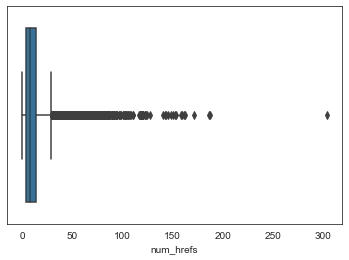

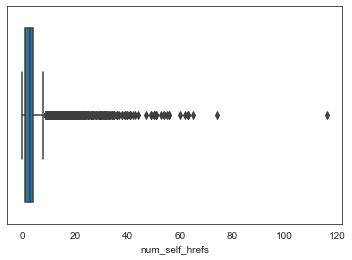

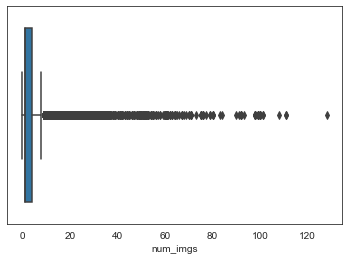

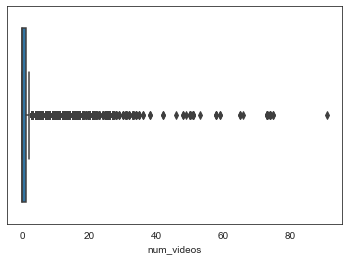

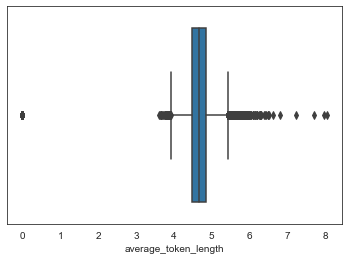

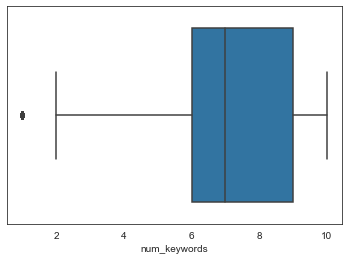

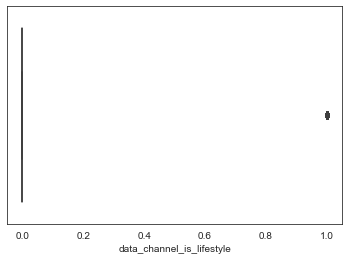

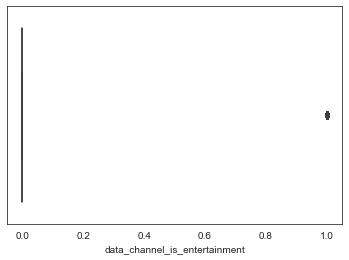

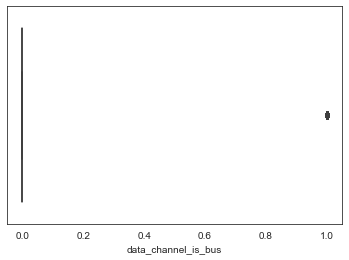

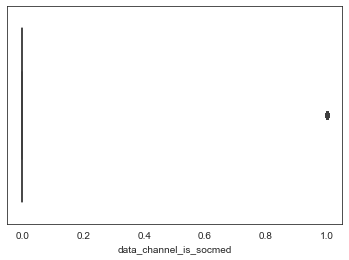

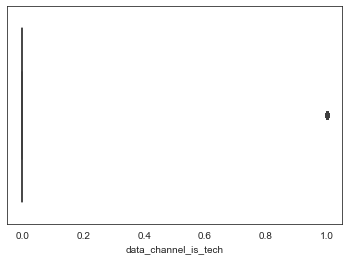

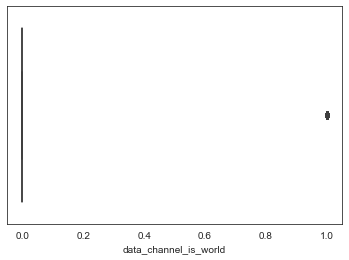

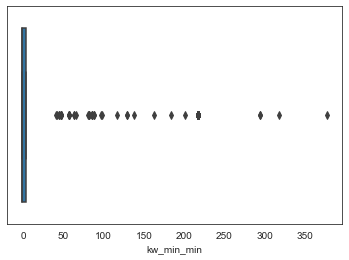

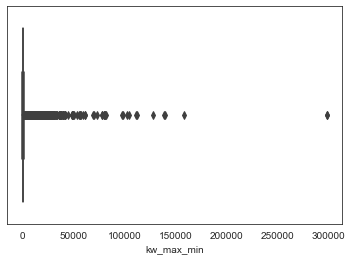

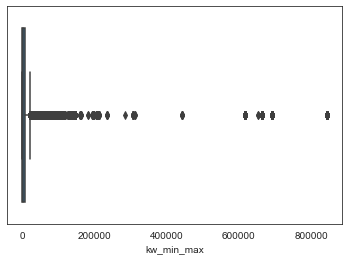

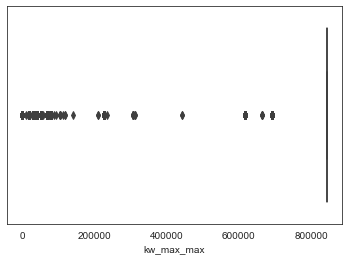

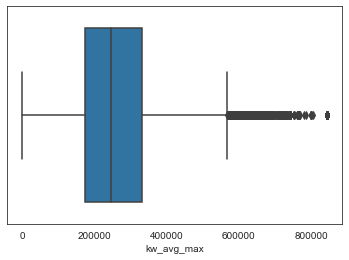

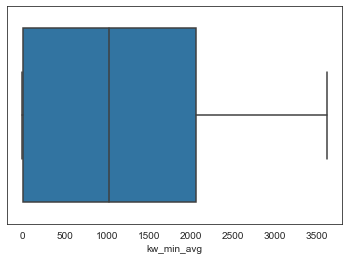

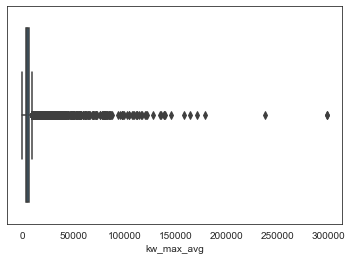

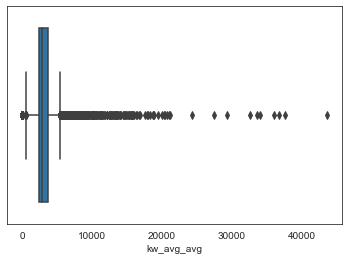

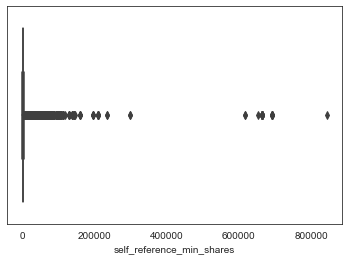

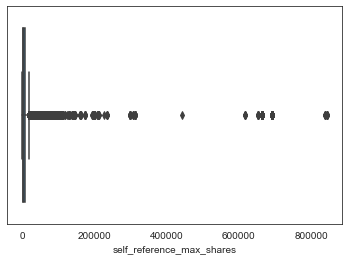

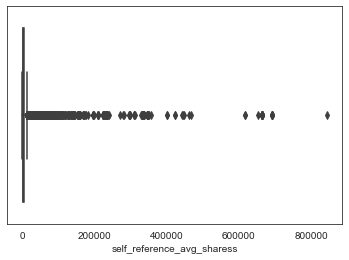

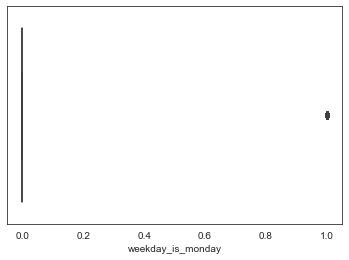

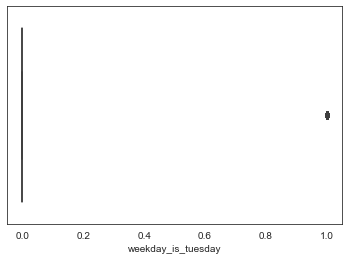

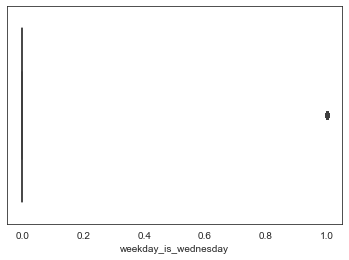

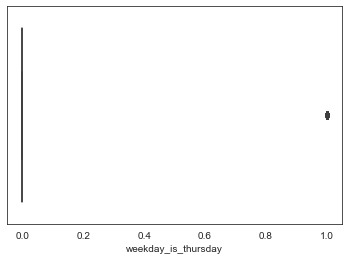

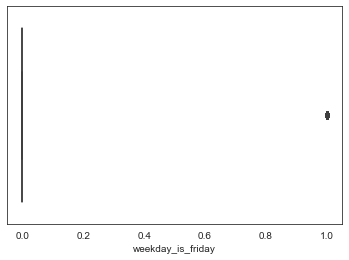

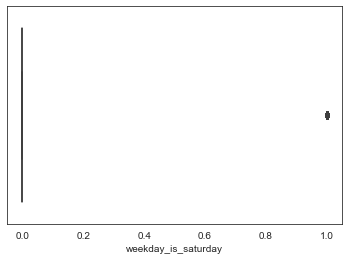

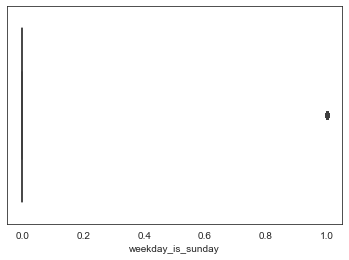

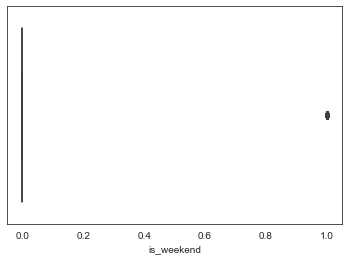

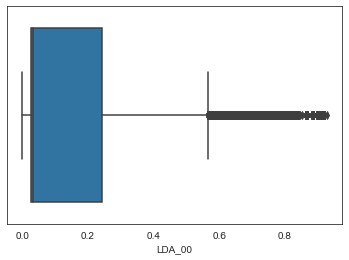

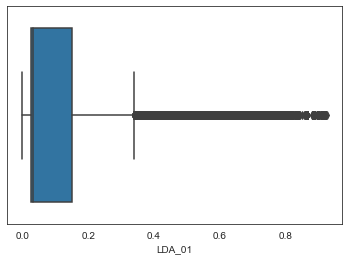

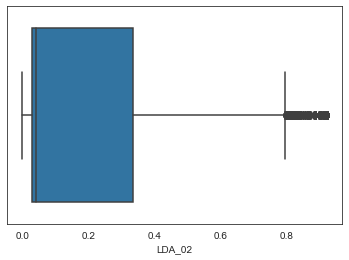

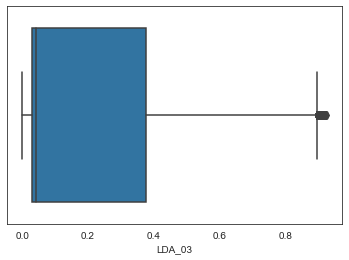

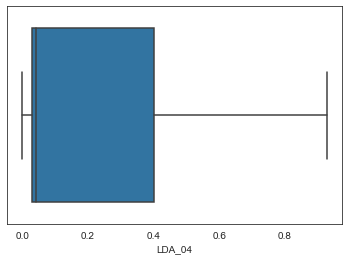

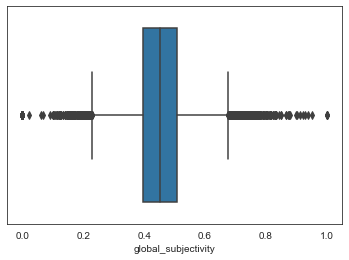

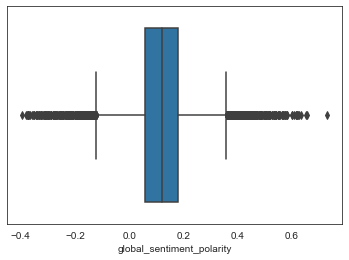

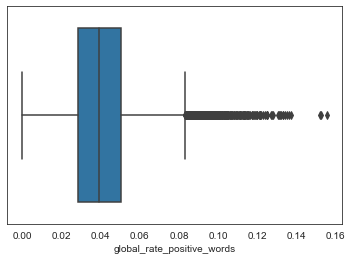

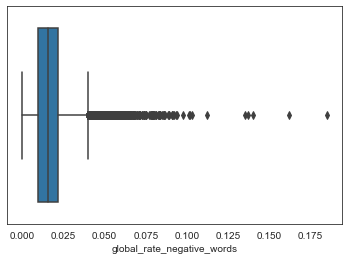

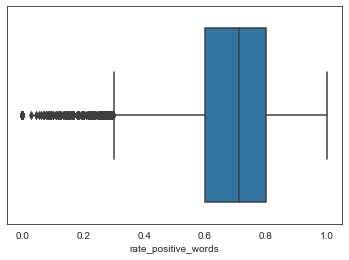

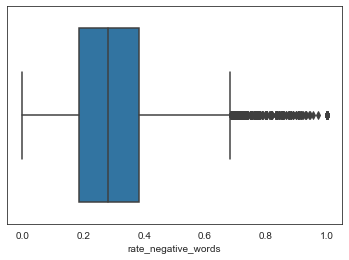

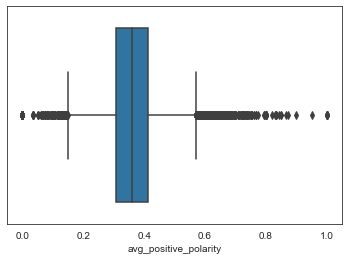

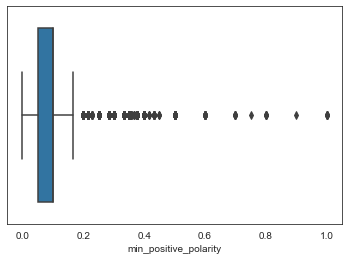

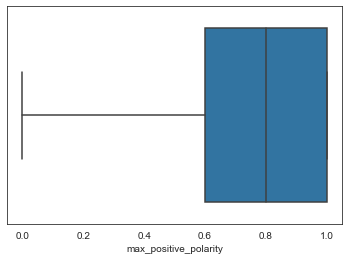

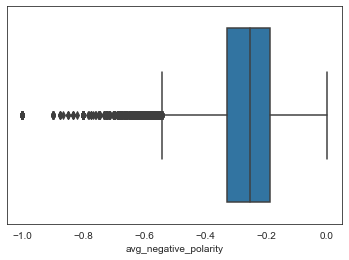

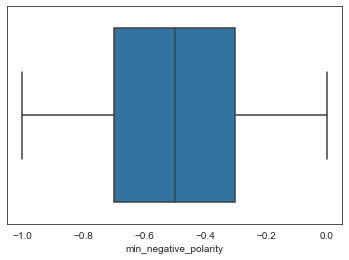

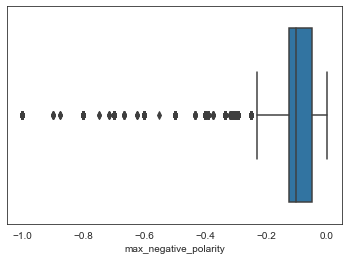

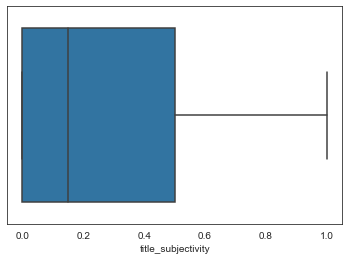

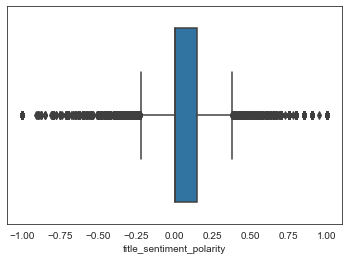

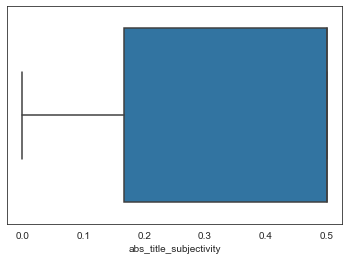

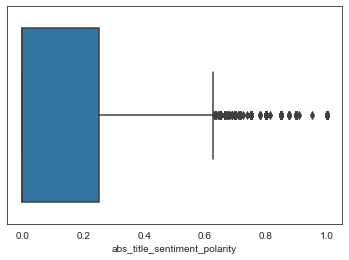

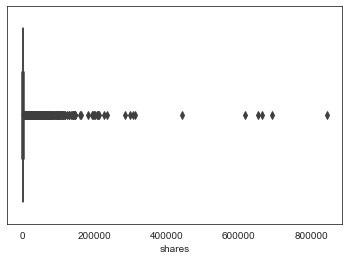

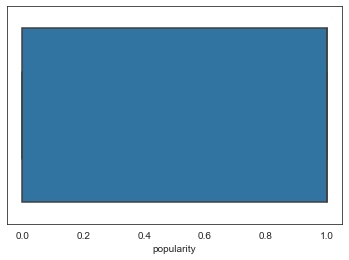

In [98]:
num_cols = data.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(data[num_cols[i]])
    plt.show()

In [99]:
##Developing Models without Feature Selection

In [100]:
# Dividing data to predictiors and target
datay=data["popularity"]
datax=data.iloc[:,1:55]


In [101]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(datax,datay, test_size = 0.25, random_state = 42)

In [102]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)



Training Features Shape: (29733, 54)
Training Labels Shape: (29733,)
Testing Features Shape: (9911, 54)
Testing Labels Shape: (9911,)


In [103]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object 
rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
rf.fit(train_features,train_labels)   

RandomForestClassifier(random_state=0)

In [106]:
y_pred=rf.predict(test_features) 

In [107]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.6638078902229846


In [108]:
## Random forest classification using 10 fold CrossValidation ( roc_auc) scoring method
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(rf,datax,datay, cv=10, scoring="roc_auc")

In [109]:
print("=== Confusion Matrix ===")
print(confusion_matrix(test_labels, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_labels, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[2808 1890]
 [1442 3771]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      4698
           1       0.67      0.72      0.69      5213

    accuracy                           0.66      9911
   macro avg       0.66      0.66      0.66      9911
weighted avg       0.66      0.66      0.66      9911



=== All AUC Scores ===
[0.54901579 0.63935035 0.69249996 0.71274298 0.70657885 0.72383526
 0.73780831 0.72902943 0.74981864 0.72403663]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6964716194895253


In [110]:
rfc_cv_score

array([0.54901579, 0.63935035, 0.69249996, 0.71274298, 0.70657885,
       0.72383526, 0.73780831, 0.72902943, 0.74981864, 0.72403663])

In [111]:
#### Random forest classification using 10 fold CrossValidation with default scoring
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score2 = cross_val_score(rf,datax,datay, cv=10)

In [36]:
rfc_cv_score2

array([0.5372005 , 0.60277427, 0.64337957, 0.66456494, 0.65590313,
       0.6715439 , 0.6765893 , 0.67255298, 0.68365288, 0.66422805])

In [37]:
print("Mean Score - Random Forest: ", rfc_cv_score2.mean())

Mean Score - Random Forest:  0.6472389525909733


KNN

In [112]:
# before scaling the training data

In [113]:
from sklearn.neighbors import KNeighborsClassifier
# we run from k=1 till k=25 to get the highest results
k_range=range(1,26)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features,train_labels)
    y_pred=knn.predict(test_features)
    scores[k]=metrics.accuracy_score(test_labels,y_pred)
    scores_list.append(metrics.accuracy_score(test_labels,y_pred))

In [115]:
def Average(lst): 
    return sum(lst) / len(lst) 

In [122]:
scores_list

[0.5468671173443649,
 0.5300171526586621,
 0.5632125920694179,
 0.5564524265967107,
 0.5660377358490566,
 0.5555443446675411,
 0.5707799414791646,
 0.5665422258097064,
 0.5781454949046514,
 0.574513167187973,
 0.5759257390777923,
 0.569770961557865,
 0.5781454949046514,
 0.5774392089597417,
 0.5802643527393805,
 0.5794571688023409,
 0.5840984764403189,
 0.5804661487236404,
 0.586217334275048,
 0.5808697406921602,
 0.5864191302593078,
 0.5855110483301382,
 0.5904550499445061,
 0.5844011704167087,
 0.5870245182120876]

In [116]:
Average(scores_list)

0.5733831096761175

Text(0, 0.5, 'Accuracy')

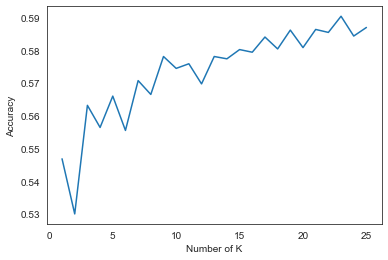

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel("Number of K")
plt.ylabel("Accuracy")

In [118]:
# Running K Nearest Neighbor algorithm with multiple Ks in order to find the optimal number of K using elbow plot.
error_rate = []
# Will take some time
for i in range(1,26):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(train_features,train_labels)
 pred_i = knn.predict(test_features)
 error_rate.append(np.mean(pred_i != test_labels))

Text(0, 0.5, 'Error Rate')

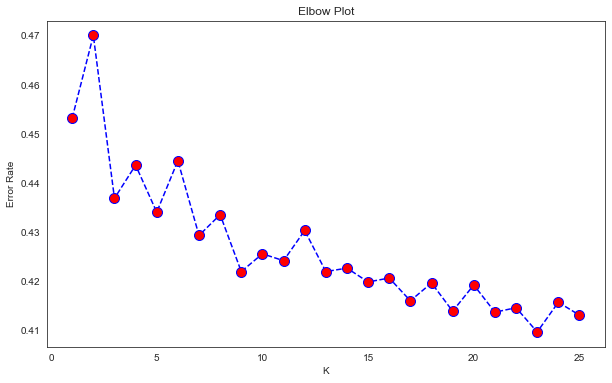

In [119]:
#Plotting an elbow plot

plt.figure(figsize=(10,6))
plt.plot(range(1,26),error_rate,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("Elbow Plot")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [120]:
#KNN after scaling the data

In [121]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train_features)
X_test_minmax= min_max_scaler.fit_transform(test_features)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
# we run from k=1 till k=25 to get the highest results
k_range=range(1,26)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax,train_labels)
    y_pred=knn.predict(X_test_minmax)
    scores[k]=metrics.accuracy_score(test_labels,y_pred)
    scores_list.append(metrics.accuracy_score(test_labels,y_pred))

In [47]:
scores_list

[0.5734032892745434,
 0.560387448289779,
 0.5916658258500656,
 0.5893451720310766,
 0.6003430531732419,
 0.5973161134093432,
 0.607002320653819,
 0.6082130965593785,
 0.6107355463626274,
 0.611542730299667,
 0.611744526283927,
 0.6170921198668147,
 0.6154777519927354,
 0.6220361214811825,
 0.623246897386742,
 0.623145999394612,
 0.6265765311270306,
 0.6267783271112904,
 0.6257693471899909,
 0.6249621632529513,
 0.6254666532136011,
 0.6273837150640702,
 0.6256684491978609,
 0.6251639592372111,
 0.6272828170719402]

In [48]:
# Average Scores
sum(scores_list) / len(scores_list)

0.61190999899102

Text(0, 0.5, 'Accuracy')

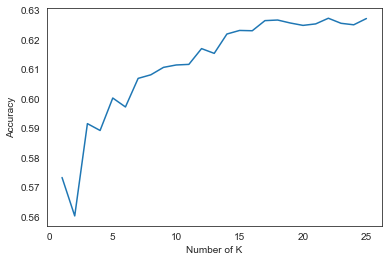

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel("Number of K")
plt.ylabel("Accuracy")

In [50]:
error_rate = []
# Will take some time
for i in range(1,26):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_minmax,train_labels)
 pred_i = knn.predict(X_test_minmax)
 error_rate.append(np.mean(pred_i != test_labels))

Text(0, 0.5, 'Error Rate')

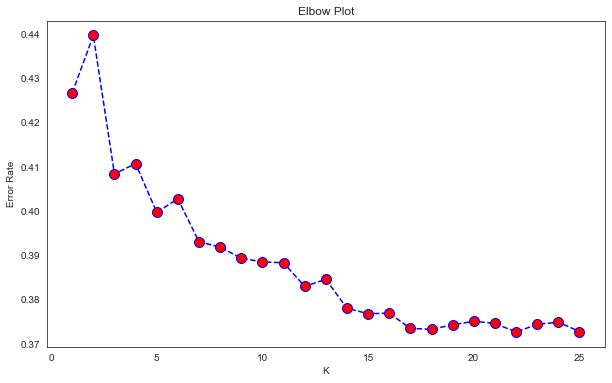

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,26),error_rate,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("Elbow Plot")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [52]:
#KNN with normalized features and cross validation

In [123]:
# use the same model as before
knn = KNeighborsClassifier(n_neighbors = 5)
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn,datax, datay, cv=10, scoring='accuracy')
# print all 5 times scores 
print(scores)
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())

[0.50643127 0.41008827 0.48953342 0.56065574 0.56432896 0.56432896
 0.5648335  0.58097881 0.57744702 0.56407669]
0.5382702646644516


In [54]:
# Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
naive_bayes_clf=clf.fit(X_train_minmax, train_labels)

In [56]:
y_prediction=naive_bayes_clf.predict(X_test_minmax)

In [57]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, y_prediction))

Accuracy: 0.5253758450206841


In [58]:
#Naive Bayes with Cross Validation

In [59]:
naive_bayes_cv_score = cross_val_score(naive_bayes_clf,datax,datay, cv=10, scoring="roc_auc")

In [60]:
print(naive_bayes_cv_score)
print(naive_bayes_cv_score.mean())

[0.5        0.62253648 0.63375518 0.62107129 0.63359173 0.6173243
 0.62059129 0.6470678  0.65795402 0.64118896]
0.6195081043336279


Now lets apply these algorithms again with feature selection

In [61]:
##Feature Selection
#Univaritate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
Y=data['popularity']
X=data.iloc[:,1:60]
test = SelectKBest(score_func=f_classif, k=20)  #Select features according to the k highest scores. 
# f_classif Compute the ANOVA F-value for the provided sample. # Number of top features to select
fit = test.fit(X, Y)
print(fit.scores_)
features = fit.transform(X) #Reduces X to the selected features
# summarize selected features
print(features[0:5,:])

[6.81692389e+01 3.18976845e-01 3.25384098e+02 6.51945158e+01
 1.79792206e+02 2.14201933e+00 3.27102664e+01 2.12879931e+02
 5.37589081e+01 5.23415977e+02 5.66664874e-01 5.03990473e+02
 4.23667435e+02 9.65484629e+02 1.04425196e+02 2.55220543e+01
 2.13716519e+00 4.75113867e+01 9.95414713e+00 3.28877426e+02
 1.97991454e+02 1.01215730e+03 1.11291750e+02 1.46436873e+02
 1.69779378e+02 1.93442760e+01 5.71777764e+01 7.99327458e+01
 2.94990545e+01 4.14432253e+00 4.76103909e+02 2.80851679e+02
 8.02383879e+02 1.80111713e+02 2.48153250e+02 1.04010742e+03
 1.36574875e+02 3.60082347e+02 1.84475867e+02 2.15597222e+02
 1.47653830e+02 2.65870260e+01 7.26460130e+01 2.02264220e+02
 3.18441386e+01 2.77831057e+01 7.05628885e+01 6.30354533e-02
 8.35835481e-03 3.54168776e-03 4.16937365e+01 1.13679026e+02
 3.97473332e-01 6.54742851e+01 1.64988057e+03            inf]
[[4.00000000e+00 5.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [62]:
# Let's see the selected columns which are now our new X
cols = test.get_support(indices=True)
features_df_new = X.iloc[:,cols]
features_df_new.columns

Index(['num_hrefs', 'num_keywords', 'data_channel_is_entertainment',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_01',
       'LDA_02', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'rate_negative_words', 'shares', 'popularity'],
      dtype='object')

In [124]:
# Dividing data to predictiors and target with 20 best variables 
datay2=data["popularity"]
datax2=data[['num_hrefs', 'num_keywords', 'data_channel_is_entertainment','data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
            'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_01',
            'LDA_02', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
            'rate_negative_words']]



In [125]:
# Using Skicit-learn to split data again into new training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(datax2,datay2, test_size = 0.25, random_state = 42)

In [126]:
print('Training Features Shape:', train_features2.shape)
print('Training Labels Shape:', train_labels2.shape)
print('Testing Features Shape:', test_features2.shape)
print('Testing Labels Shape:', test_labels2.shape)


Training Features Shape: (29733, 18)
Training Labels Shape: (29733,)
Testing Features Shape: (9911, 18)
Testing Labels Shape: (9911,)


In [127]:
# Fitting Random Forest Classifier to the dataset 
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object 
rf2 = RandomForestClassifier(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
rf2.fit(train_features2,train_labels2)   

RandomForestClassifier(random_state=0)

In [128]:
y_pred2=rf2.predict(test_features2) 

In [129]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels2, y_pred2))

Accuracy: 0.6473615175058016


In [155]:
#### Random forest classification using 10 fold CrossValidation with default scoring
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score2 = cross_val_score(rf,datax2,datay2, cv=10)

In [134]:
rfc_cv_score2.mean()

0.6344488225046859

In [135]:
#KNN with feature selection
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax2 = min_max_scaler.fit_transform(train_features2)
X_test_minmax2= min_max_scaler.fit_transform(test_features2)

In [137]:
from sklearn.neighbors import KNeighborsClassifier
# we run from k=1 till k=25 to get the highest results
k_range=range(1,26)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax2,train_labels2)
    y_pred3=knn.predict(X_test_minmax2)
    scores[k]=metrics.accuracy_score(test_labels2,y_pred2)
    scores_list.append(metrics.accuracy_score(test_labels2,y_pred3))

In [138]:
# Average Scores
sum(scores_list) / len(scores_list)

0.6133629300776914

Text(0, 0.5, 'Accuracy')

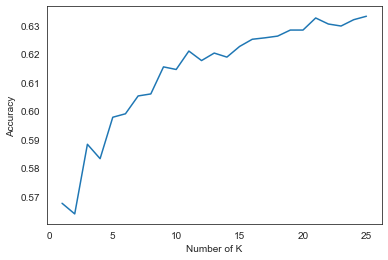

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel("Number of K")
plt.ylabel("Accuracy")

In [140]:
error_rate2 = []
# Will take some time
for i in range(1,26):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_minmax2,train_labels2)
 pred_i = knn.predict(X_test_minmax2)
 error_rate2.append(np.mean(pred_i != test_labels2))

Text(0, 0.5, 'Error Rate')

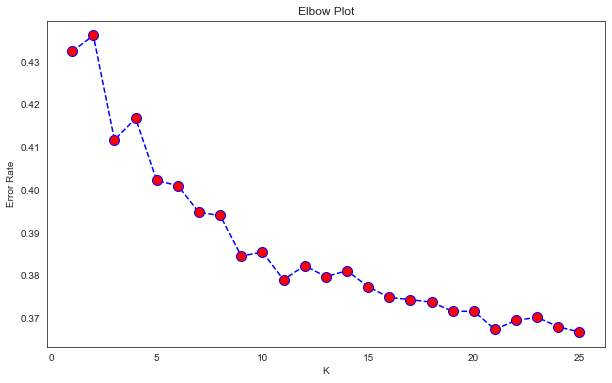

In [141]:
plt.figure(figsize=(10,6))
plt.plot(range(1,26),error_rate2,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("Elbow Plot")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [142]:
# use the same model as before
knn = KNeighborsClassifier(n_neighbors = 5)
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn,datax2, datay2, cv=10, scoring='accuracy')
# print all 5 times scores 
print(scores)
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())

[0.53518285 0.53240858 0.54224464 0.56847415 0.5580222  0.54717457
 0.540111   0.55045409 0.56609485 0.55474268]
0.5494909608926747


In [ ]:
# Naive Bayes with top 20 variables

In [143]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
naive_bayes_clf=clf.fit(X_train_minmax2, train_labels2)

In [144]:
y_prediction2=naive_bayes_clf.predict(X_test_minmax2)

In [145]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels2, y_prediction2))

Accuracy: 0.611643628291797


In [ ]:
# Naive Bayes with Cross Validation

In [146]:
naive_bayes_cv_score2 = cross_val_score(naive_bayes_clf,datax2,datay2, cv=10, scoring="roc_auc")

In [147]:
print(naive_bayes_cv_score2)
print(naive_bayes_cv_score2.mean())

[0.63538714 0.6552984  0.65450542 0.65253737 0.66986717 0.70853148
 0.69695676 0.69920639 0.70561009 0.68373141]
0.6761631627684713


#Let's try another feature selection method

##We will manually set the threshold for correlation between features and between features and label

df_X_norm_corr Index(['n_tokens_content', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_

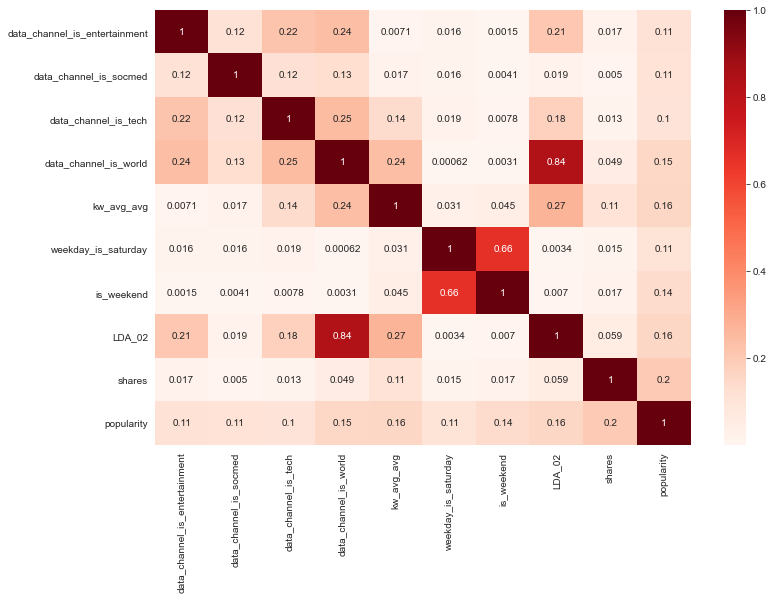

df_X_norm_corr Index(['data_channel_is_entertainment', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world', 'kw_avg_avg',
       'weekday_is_saturday', 'shares'],
      dtype='object')


In [148]:
import seaborn as sns
corr_with_label = 0.1  #correlation threshold for target ( *** Guys what should be this threshold***)
corr_between_features = 0.50 #correlation threshold between features
cor = X.corr()
# drop less correlated ones with target
corr_target = abs(cor['popularity'])
relevant_features = corr_target[corr_target > corr_with_label]
df_X_norm_corr = X[list(relevant_features.index)]
print('df_X_norm_corr', X.columns)

cor = df_X_norm_corr.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
# drop highly correlated features
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > corr_between_features)]
df_X_norm_corr = df_X_norm_corr.drop(df_X_norm_corr[to_drop], axis=1)
df_X_norm_corr = df_X_norm_corr[[cols for cols in df_X_norm_corr.columns if cols != 'popularity']]
print('df_X_norm_corr', df_X_norm_corr.columns)


In [149]:
# Dividing data to predictiors and target with 20 best variables 
datay3=data["popularity"]
datax3=data[['data_channel_is_entertainment', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world', 'kw_avg_avg',
       'weekday_is_saturday']]

In [150]:
# Using Skicit-learn to split data again into new training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features3, test_features3, train_labels3, test_labels3 = train_test_split(datax3,datay3, test_size = 0.25, random_state = 42)

In [151]:
print('Training Features Shape:', train_features3.shape)
print('Training Labels Shape:', train_labels3.shape)
print('Testing Features Shape:', test_features3.shape)
print('Testing Labels Shape:', test_labels3.shape)


Training Features Shape: (29733, 6)
Training Labels Shape: (29733,)
Testing Features Shape: (9911, 6)
Testing Labels Shape: (9911,)


In [152]:
# Fitting Random Forest Classifier to the dataset 
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object 
rf3 = RandomForestClassifier(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
rf3.fit(train_features3,train_labels3) 

RandomForestClassifier(random_state=0)

In [153]:
y_pred3=rf3.predict(test_features3) 

In [154]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels3, y_pred3))

Accuracy: 0.5440419735647261


In [157]:
# Random forest, Pearson Correlation with Cross Validation
#### Random forest classification using 10 fold CrossValidation with default scoring
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score7 = cross_val_score(rf,datax3,datay3, cv=10)

In [158]:
rfc_cv_score7.mean()

0.5505759846181841

In [159]:
#KNN with feature selection method # 2
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax3 = min_max_scaler.fit_transform(train_features3)
X_test_minmax3= min_max_scaler.fit_transform(test_features3)

In [160]:
from sklearn.neighbors import KNeighborsClassifier
# we run from k=1 till k=25 to get the highest results
k_range3=range(1,26)
scores={}
scores_list3=[]
for k in k_range3:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax3,train_labels3)
    y_pred3=knn.predict(X_test_minmax3)
    scores[k]=metrics.accuracy_score(test_labels3,y_pred3)
    scores_list3.append(metrics.accuracy_score(test_labels3,y_pred3))

In [161]:
# Average Scores
sum(scores_list3) / len(scores_list3)

0.5930420744627181

In [162]:
# use the same model as before
knn = KNeighborsClassifier(n_neighbors = 5)
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn,datax3, datay3, cv=10, scoring='accuracy')
# print all 5 times scores 
print(scores)
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())

[0.52131148 0.54678436 0.56973518 0.56771753 0.56861756 0.58678103
 0.58350151 0.57921292 0.58804238 0.58072654]
0.5692430487247777


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range3,scores_list3)
plt.xlabel("Number of K")
plt.ylabel("Accuracy")

In [ ]:
# Creating an elbow plot
error_rate3 = []
# Will take some time
for i in range(1,26):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_minmax3,train_labels3)
 pred_i = knn.predict(X_test_minmax3)
 error_rate3.append(np.mean(pred_i != test_labels3))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,26),error_rate3,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("Elbow Plot")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
# Naive Bayes with Cross Validation ( feature selection method 3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
naive_bayes_clf=clf.fit(X_train_minmax3, train_labels3)

In [163]:
naive_bayes_cv_score3 = cross_val_score(naive_bayes_clf,datax3,datay3, cv=10, scoring="roc_auc")

In [164]:
print(naive_bayes_cv_score3)
print(naive_bayes_cv_score3.mean())

[0.6242814  0.639443   0.65108292 0.64646245 0.66515822 0.69065638
 0.68148395 0.68613729 0.69052417 0.67279764]
0.6648027420660025


In [166]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
naive_bayes_clf=clf.fit(X_train_minmax3, train_labels3)

In [167]:
y_prediction2=naive_bayes_clf.predict(X_test_minmax3)

In [169]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels3, y_prediction2))

Accuracy: 0.576632025022702


In [165]:
# 4th method of feature selection: Decision Tree important features

In [170]:
decisionTree = sklearn.tree.DecisionTreeClassifier()

decision_tree_model_fitted=decisionTree.fit(datax, datay)

In [171]:
important_features=decisionTree.feature_importances_
important_features_with_cols_names=dict(zip(X.columns, important_features))
important_features_with_cols_names


{'n_tokens_content': 0.02901097522796078,
 'n_unique_tokens': 0.03597240196327301,
 'num_hrefs': 0.022154986717792754,
 'num_self_hrefs': 0.014645940719151894,
 'num_imgs': 0.015523785756237637,
 'num_videos': 0.009012979503801965,
 'average_token_length': 0.03502999144632751,
 'num_keywords': 0.005913687075405826,
 'data_channel_is_lifestyle': 0.0019678430528113295,
 'data_channel_is_entertainment': 0.01332432486757787,
 'data_channel_is_bus': 0.0003458158990472362,
 'data_channel_is_socmed': 0.010667153252643452,
 'data_channel_is_tech': 0.012955973902932967,
 'data_channel_is_world': 0.002255134594523378,
 'kw_min_min': 0.003880332344420135,
 'kw_max_min': 0.0315946147373404,
 'kw_min_max': 0.015519397577979946,
 'kw_max_max': 0.010044482835022402,
 'kw_avg_max': 0.0377311094510131,
 'kw_min_avg': 0.0186100846686004,
 'kw_max_avg': 0.046654991805295455,
 'kw_avg_avg': 0.07582840458721848,
 'self_reference_min_shares': 0.030146345707332902,
 'self_reference_max_shares': 0.01793369133

In [172]:
sorted(important_features_with_cols_names)

['LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'abs_title_sentiment_polarity',
 'abs_title_subjectivity',
 'average_token_length',
 'avg_negative_polarity',
 'avg_positive_polarity',
 'data_channel_is_bus',
 'data_channel_is_entertainment',
 'data_channel_is_lifestyle',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'global_rate_negative_words',
 'global_rate_positive_words',
 'global_sentiment_polarity',
 'global_subjectivity',
 'is_weekend',
 'kw_avg_avg',
 'kw_avg_max',
 'kw_max_avg',
 'kw_max_max',
 'kw_max_min',
 'kw_min_avg',
 'kw_min_max',
 'kw_min_min',
 'max_negative_polarity',
 'max_positive_polarity',
 'min_negative_polarity',
 'min_positive_polarity',
 'n_tokens_content',
 'n_unique_tokens',
 'num_hrefs',
 'num_imgs',
 'num_keywords',
 'num_self_hrefs',
 'num_videos',
 'rate_negative_words',
 'rate_positive_words',
 'self_reference_avg_sharess',
 'self_reference_max_shares',
 'self_reference_min_shares',
 'title_sentiment_polarity',


In [173]:
# Let's sort the above dictionary by its values to get the most important columns
import operator
sorted_d = sorted(important_features_with_cols_names.items(), key=operator.itemgetter(1))
sorted_d
# Weekday_is_sunday: 1.045
# top20 = 'weekday_is_sunday', 1.0450895930266772e-05)
'''num_imgs', 0.01335191752436707),
 ('max_negative_polarity', 0.013627442074807277),
 ('title_sentiment_polarity', 0.014557761981012357),
 ('title_subjectivity', 0.014805920536880474),
 ('num_self_hrefs', 0.014964236657066374),
 ('min_positive_polarity', 0.015448503600242176),
 ('kw_min_max', 0.01598663552509196),
 ('is_weekend', 0.017054105295955815),
 ('self_reference_max_shares', 0.017913539236764153),
 ('kw_min_avg', 0.018128828135982336),
 ('self_reference_avg_sharess', 0.021051590726269404),
 ('num_hrefs', 0.021749926719840988),
 (c, 0.023827635722735784),
 ('global_rate_negative_words', 0.024821420836417838),
 ('global_sentiment_polarity', 0.026360454608189258),
 ('LDA_03', 0.02783141610516509),
 ('global_rate_positive_words', 0.0285345107456756),
 ('LDA_04', 0.029008382009918468),
 ('n_tokens_content', 0.029123628062578604),
 ('self_reference_min_shares', 0.030137865829299594),
 ('LDA_00', 0.030462964381047813),
 ('LDA_01', 0.030950966060679593),
 ('kw_max_min', 0.031504356988329395),
 ('average_token_length', 0.03216322244476452),
 ('avg_positive_polarity', 0.03227759985849498),
 ('global_subjectivity', 0.03390178082949535),
 ('n_unique_tokens', 0.035016232452548965),
 ('LDA_02', 0.03909457584829349),
 ('kw_avg_max', 0.03996009086322814),
 ('kw_max_avg', 0.04674965339878114),
 ('kw_avg_avg', 0.07702675307075975
'''

      
      
      
      


"num_imgs', 0.01335191752436707),\n ('max_negative_polarity', 0.013627442074807277),\n ('title_sentiment_polarity', 0.014557761981012357),\n ('title_subjectivity', 0.014805920536880474),\n ('num_self_hrefs', 0.014964236657066374),\n ('min_positive_polarity', 0.015448503600242176),\n ('kw_min_max', 0.01598663552509196),\n ('is_weekend', 0.017054105295955815),\n ('self_reference_max_shares', 0.017913539236764153),\n ('kw_min_avg', 0.018128828135982336),\n ('self_reference_avg_sharess', 0.021051590726269404),\n ('num_hrefs', 0.021749926719840988),\n (c, 0.023827635722735784),\n ('global_rate_negative_words', 0.024821420836417838),\n ('global_sentiment_polarity', 0.026360454608189258),\n ('LDA_03', 0.02783141610516509),\n ('global_rate_positive_words', 0.0285345107456756),\n ('LDA_04', 0.029008382009918468),\n ('n_tokens_content', 0.029123628062578604),\n ('self_reference_min_shares', 0.030137865829299594),\n ('LDA_00', 0.030462964381047813),\n ('LDA_01', 0.030950966060679593),\n ('kw_max_

In [174]:
# Apply models from top 34 columns
datax4=data[['num_imgs','max_negative_polarity','title_sentiment_polarity','title_subjectivity','num_self_hrefs',
'min_positive_polarity','kw_min_max','is_weekend','self_reference_max_shares','kw_min_avg','self_reference_avg_sharess',
      'kw_min_avg','is_weekend','self_reference_max_shares','kw_min_avg','self_reference_avg_sharess','kw_min_avg','is_weekend',
      'self_reference_avg_sharess','num_hrefs','global_rate_negative_words','LDA_03','global_rate_positive_words','LDA_04','n_tokens_content',
      'self_reference_min_shares','LDA_00','LDA_01','kw_max_min','average_token_length','avg_positive_polarity',
      'global_subjectivity','n_unique_tokens','LDA_02','kw_avg_max','kw_max_avg','kw_avg_avg']]
datay4=data["popularity"]

In [175]:
# Using Skicit-learn to split data again into new training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features4, test_features4, train_labels4, test_labels4 = train_test_split(datax4,datay4, test_size = 0.25, random_state = 42)

In [176]:
print('Training Features Shape:', train_features4.shape)
print('Training Labels Shape:', train_labels4.shape)
print('Testing Features Shape:', test_features4.shape)
print('Testing Labels Shape:', test_labels4.shape)


Training Features Shape: (29733, 37)
Training Labels Shape: (29733,)
Testing Features Shape: (9911, 37)
Testing Labels Shape: (9911,)


In [177]:
# Fitting Random Forest Classifier to the dataset 
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object 
rf4 = RandomForestClassifier(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
rf4.fit(train_features4,train_labels4)  

RandomForestClassifier(random_state=0)

In [178]:
y_pred4 =rf4.predict(test_features4) 

In [179]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels4, y_pred4))

Accuracy: 0.6565432347896277


In [180]:
# Random forest, Pearson Correlation with Cross Validation
#### Random forest classification using 10 fold CrossValidation with default scoring
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score7 = cross_val_score(rf,datax4,datay4, cv=10)

In [181]:
rfc_cv_score7.mean()

0.6485742553091315

In [182]:
#KNN with feature selection
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax4 = min_max_scaler.fit_transform(train_features4)
X_test_minmax4= min_max_scaler.fit_transform(test_features4)

In [183]:
from sklearn.neighbors import KNeighborsClassifier
# we run from k=1 till k=25 to get the highest results
k_range4=range(1,26)
scores={}
scores_list4=[]
for k in k_range4:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax4,train_labels4)
    y_pred4=knn.predict(X_test_minmax4)
    scores[k]=metrics.accuracy_score(test_labels4,y_pred4)
    scores_list4.append(metrics.accuracy_score(test_labels4,y_pred4))

In [184]:
# Average Scores
sum(scores_list4) / len(scores_list4)

0.5993623246897388

In [185]:
# use the same model as before - Using Cross Validation
knn = KNeighborsClassifier(n_neighbors = 5)
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn,datax2, datay2, cv=10, scoring='accuracy')
# print all 5 times scores 
print(scores)
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())

[0.53518285 0.53240858 0.54224464 0.56847415 0.5580222  0.54717457
 0.540111   0.55045409 0.56609485 0.55474268]
0.5494909608926747


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range4,scores_list4)
plt.xlabel("Number of K")
plt.ylabel("Accuracy")

In [ ]:
error_rate4 = []
# Will take some time
for i in range(1,26):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_minmax4,train_labels4)
 pred_i = knn.predict(X_test_minmax4)
 error_rate4.append(np.mean(pred_i != test_labels4))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,26),error_rate4,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("Elbow Plot")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
# Naive Bayes with Cross Validation ( feature selection method 4)

In [186]:
naive_bayes_cv_score4 = cross_val_score(naive_bayes_clf,datax4,datay4, cv=10, scoring="roc_auc")

In [187]:
print(naive_bayes_cv_score)
print(naive_bayes_cv_score.mean())

[0.5        0.62253648 0.63375518 0.62107129 0.63359173 0.6173243
 0.62059129 0.6470678  0.65795402 0.64118896]
0.6195081043336279


In [188]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
naive_bayes_clf=clf.fit(X_train_minmax4, train_labels4)

In [190]:
y_prediction2=naive_bayes_clf.predict(X_test_minmax4)

In [191]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels4, y_prediction2))

Accuracy: 0.525678538997074
